## Histogram Equalization

정규화된 누적분포함수를 이용하여 히스토그램을  평활화

([], <a list of 0 Text yticklabel objects>)

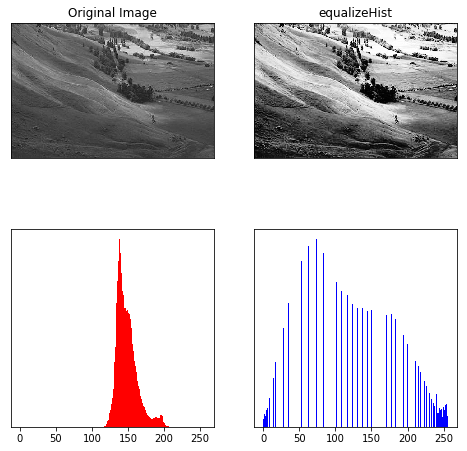

In [19]:
img = cv.imread('images/hawkes.bmp',0)
equ = cv.equalizeHist(img)

plt.figure(figsize=(8,8))
plt.subplot(221),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(equ,cmap = 'gray')
plt.title('equalizeHist'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.yticks([])
plt.subplot(224),plt.hist(equ.flatten(),256,[0,256], color = 'b')
plt.yticks([])

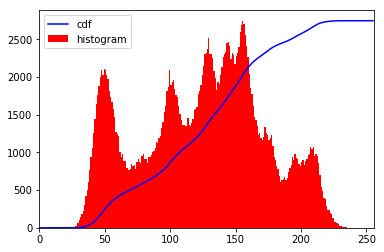

In [20]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('images/lenna.bmp',0)

#(1)히스토그램을 구한다
hist,bins = np.histogram(img.flatten(),256,[0,256])
#(2)정규화된 누적분포함수를 구한다.
cdf = hist.cumsum()   #누적합, 누적분포함수(CDF)
cdf_normalized = cdf * float(hist.max()) / cdf.max() #누적합에 최대밝기값을 곱하여 픽셀개수로 나누어 정규화

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#(3)CDF 균일화 처리
cdf_m = np.ma.masked_equal(cdf,0)       #cdf에서 값이 0인 부분 제외
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min()) #균일화 처리 
cdf = np.ma.filled(cdf_m,0).astype('uint8')  #cdf에서 마스크부분을 0으로 채우기

#(4)정규화된 cdf 값으로 영상의 픽셀 값을 변환 
img2 = cdf[img]

([], <a list of 0 Text yticklabel objects>)

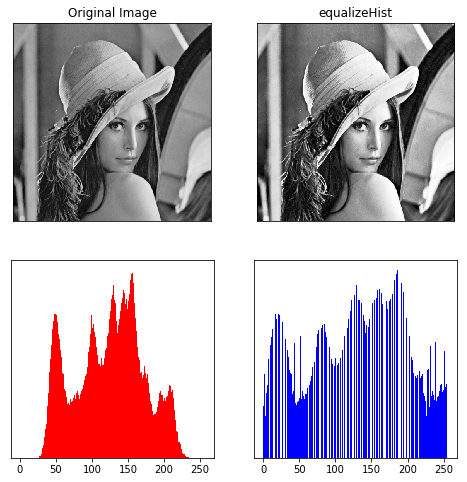

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(221),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img2,cmap = 'gray')
plt.title('equalizeHist'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.yticks([])
plt.subplot(224),plt.hist(img2.flatten(),256,[0,256], color = 'b')
plt.yticks([])